In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from function_PCA import *

In [91]:
df = pd.read_csv("D:/School/cours_5eme/projet/code/VeRemi/last_VeReMi/database/cleandataVeReMi_final_undersampling.csv")
df

TypeError: read_csv() got an unexpected keyword argument 'index'

In [113]:
test = df.groupby(["sender", 'receiver', 'attackerType']).mean()
test.columns

Index(['rcvTime', 'sendTime', 'messageID', 'RSSI', 'pos_x', 'pos_y', 'spd_x',
       'spd_y', 'global_pos', 'global_spd'],
      dtype='object')

In [86]:
list_col_supp = ['type', 'pos_z', 'spd_z', 'Unnamed: 0']
df = delete_column_df(df, list_col_supp)

In [87]:
def list_all_pairs_ids(df_id_recever_sender):    
    liste_sender_id = []
    liste_each_pairs_ids = []

    for sender_id in df_id_recever_sender['sender'].unique():
        liste_sender_id.append(df_id_recever_sender[df_id_recever_sender['sender'] == sender_id])

    for df_pairs in liste_sender_id:
        for receiver_id in df_pairs['receiver'].unique():
            liste_each_pairs_ids.append(df_pairs[df_pairs.receiver == receiver_id])

    return liste_each_pairs_ids

In [88]:
list_pairs = list_all_pairs_ids(df)
list_pairs[0]

,rcvTime,sendTime,sender,messageID,RSSI,receiver,pos_x,pos_y,spd_x,spd_y,global_pos,global_spd,attackerType
0,18006.847838,18006.847722,133,22332,1.534798e-08,13,3602.602088,5639.120140,2.714336,-32.240633,6691.668054,32.354691,0
9053,18007.847829,18007.847722,133,26575,3.014108e-08,13,3605.302859,5607.040637,2.693131,-31.988765,6666.117085,32.101932,0
10152,18012.847831,18012.847722,133,49275,2.241812e-08,13,3619.732376,5450.196466,3.818712,-30.823959,6542.714084,31.059604,0
18073,18006.847834,18006.847722,133,22195,1.241442e-08,13,3602.602088,5639.120140,2.714336,-32.240633,6691.668054,32.354691,0
26602,18005.836625,18005.836518,133,18876,1.939738e-08,13,3624.752577,5409.674304,5.106544,-41.219104,6511.790147,41.534218,0
28400,18010.847840,18010.847722,133,40652,1.163317e-08,13,3613.281114,5512.275669,2.637270,-31.325253,6590.977700,31.436072,0
35965,18004.836627,18004.836518,133,15253,1.647561e-09,13,3619.645052,5450.901333,5.106823,-41.221358,6543.252955,41.536490,0
37237,18010.847839,18010.847722,133,40666,1.312052e-08,13,3613.281114,5512.275669,2.637270,-31.325253,6590.977700,31.436072,0
43773,18003.847839,18003.847722,133,11021,6.916517e-09,13,3598.157041,5737.555968,1.436238,-33.475142,6772.465294,33.505938,0
48499,18019.847840,18019.847722,133,79821,1.398193e-09,13,3648.814628,5237.551988,4.731038,-30.053543,6383.243894,30.423645,0


In [89]:
def order_liste_dataframe(liste, columns_value):
    for i in range(len(liste)):
        liste[i].sort_values(by=[columns_value], inplace = True)
        return liste

list_pairs = order_liste_dataframe(list_pairs, 'sendTime')

56039    39.215536             0  
 259627   39.258897             4  
 273587   39.315971             4  
 276826   31.890501             4  
 280826   39.247113             4  
 281380   39.201773             4  
 285033   39.247201             4  
 287422   39.304574             4  
 288314   39.235946             4  
 292642   39.217128             4  
 296520   39.206425             4  
 314724   39.211324             4  
 322869   39.238607             4  
 333459   31.946941             8  
 367816   31.991239             8  
 385329   31.916559             8  
 428449   31.905730            16  
 430005   31.927561            16  
 445819   39.242416            16  
 458778   39.211324            16  
 463473   39.217128            16  
 464519   39.247201            16  
 466406   39.219654            16  
 466779   39.235946            16  
 473402   39.201773            16  
 474084   39.206425            16  
 474988   39.304574            16  
 478633   39.324613          

In [90]:
list_pairs[0]

,rcvTime,sendTime,sender,messageID,RSSI,receiver,pos_x,pos_y,spd_x,spd_y,global_pos,global_spd,attackerType
55851,18003.836631,18003.836518,133,11691,2.244230e-08,13,3614.975537,5492.149464,3.487886,-41.428789,6575.086118,41.575352,0
78739,18003.836625,18003.836518,133,11327,2.121323e-08,13,3614.975537,5492.149464,3.487886,-41.428789,6575.086118,41.575352,0
43773,18003.847839,18003.847722,133,11021,6.916517e-09,13,3598.157041,5737.555968,1.436238,-33.475142,6772.465294,33.505938,0
35965,18004.836627,18004.836518,133,15253,1.647561e-09,13,3619.645052,5450.901333,5.106823,-41.221358,6543.252955,41.536490,0
59755,18005.836628,18005.836518,133,18781,1.655015e-08,13,3624.752577,5409.674304,5.106544,-41.219104,6511.790147,41.534218,0
26602,18005.836625,18005.836518,133,18876,1.939738e-08,13,3624.752577,5409.674304,5.106544,-41.219104,6511.790147,41.534218,0
0,18006.847838,18006.847722,133,22332,1.534798e-08,13,3602.602088,5639.120140,2.714336,-32.240633,6691.668054,32.354691,0
18073,18006.847834,18006.847722,133,22195,1.241442e-08,13,3602.602088,5639.120140,2.714336,-32.240633,6691.668054,32.354691,0
55514,18007.847839,18007.847722,133,26976,2.960414e-08,13,3605.302859,5607.040637,2.693131,-31.988765,6666.117085,32.101932,0
9053,18007.847829,18007.847722,133,26575,3.014108e-08,13,3605.302859,5607.040637,2.693131,-31.988765,6666.117085,32.101932,0


In [60]:
df = delete_column_df(df, list_col_supp)
df

,Unnamed: 0,rcvTime,sendTime,sender,messageID,RSSI,receiver,pos_x,pos_y,spd_x,spd_y,global_pos,global_spd,attackerType
0,0,18006.847838,18006.847722,133,22332,1.534798e-08,13,3602.602088,5639.120140,2.714336,-32.240633,6691.668054,32.354691,0
1,1,18012.765603,18012.765485,61,40581,6.239863e-08,67,5964.411794,5810.566176,-15.116330,-0.051405,8326.877622,15.116418,0
2,2,18063.951707,18063.951597,481,177455,3.370571e-08,433,3774.875647,5188.372562,17.535577,9.828139,6416.299524,20.101959,0
3,3,18000.151997,18000.151886,163,311,3.662830e-08,37,6085.774850,5734.474509,0.228543,0.017693,8361.869229,0.229227,0
4,4,18090.895799,18090.895692,307,295277,1.221987e-06,367,6086.598041,5734.538236,1.794302,0.138906,8362.512068,1.799671,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494527,494527,18043.887421,18043.887302,367,165789,1.263742e-08,61,5785.128654,5705.410526,3.512610,0.302313,8125.233929,3.525596,16
494528,494528,18056.024382,18056.024274,343,146945,7.155684e-09,337,3634.106370,5233.367665,2.956823,32.890869,6371.410347,33.023508,16
494529,494529,18013.698030,18013.697916,295,53003,1.109212e-07,55,3635.568506,5245.400407,-3.516442,30.469593,6382.130317,30.671835,16
494530,494530,18011.780831,18011.780716,277,41464,7.471631e-08,307,3632.096628,5267.657203,-3.437978,29.789713,6398.464027,29.987442,16


In [61]:
df.columns

Index(['Unnamed: 0', 'rcvTime', 'sendTime', 'sender', 'messageID', 'RSSI',
       'receiver', 'pos_x', 'pos_y', 'spd_x', 'spd_y', 'global_pos',
       'global_spd', 'attackerType'],
      dtype='object')

In [62]:
from sklearn.decomposition import PCA

def pca_global_pos(dataframe_pca, list_columns, name_new_column):
    df_pos_pca = pd.DataFrame()

    for col in list_columns:
        df_pos_pca[col] = dataframe_pca[col]

    
    pca = PCA(n_components= 1)
    pca.fit(df_pos_pca)

    df_pos_pca_transformed = pca.transform(df_pos_pca)
    dataframe_pca = dataframe_pca.drop(list_columns, axis = 1)
    dataframe_pca[name_new_column] = df_pos_pca_transformed
    return dataframe_pca


In [63]:
from sklearn.model_selection import train_test_split
X = df.drop(['attackerType'], axis = 1)
Y = df['attackerType']
Y = pd.get_dummies(Y, columns=['attackerType'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [64]:
list_columns = ['pos_x', 'global_pos']
name_new_column = 'pca_column'
X_train_pca = pca_global_pos(X_train, list_columns, name_new_column)
X_test_pca = pca_global_pos(X_test, list_columns, name_new_column)

In [65]:
np.shape(X_train_pca)

(395625, 12)

In [66]:
model=Sequential()

model.add(Dense(64, input_shape=(12,), activation='relu'))
model.add(Dense(32, activation='relu',))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
history = model.fit(X_train_pca, Y_train, validation_data = (X_test_pca, Y_test), epochs=10)
Y_predicted = model.predict(X_test_pca)
matrix = confusion_matrix_pca(Y_predicted, Y_test)

Epoch 1/10
12364/12364 [==============================] - 34s 3ms/step - loss: 111.9741 - accuracy: 0.8146 - val_loss: 53.7829 - val_accuracy: 0.8645
Epoch 2/10
12364/12364 [==============================] - 22s 2ms/step - loss: 8.6345 - accuracy: 0.8594 - val_loss: 1.1994 - val_accuracy: 0.5312
Epoch 3/10
12364/12364 [==============================] - 18s 1ms/step - loss: 0.9938 - accuracy: 0.5770 - val_loss: 1.0265 - val_accuracy: 0.5095
Epoch 4/10
12364/12364 [==============================] - 28s 2ms/step - loss: 1.0873 - accuracy: 0.5057 - val_loss: 0.9175 - val_accuracy: 0.5573
Epoch 5/10
12364/12364 [==============================] - 32s 3ms/step - loss: 1.0382 - accuracy: 0.5343 - val_loss: 0.8477 - val_accuracy: 0.5710
Epoch 6/10
12364/12364 [==============================] - 36s 3ms/step - loss: 1.1562 - accuracy: 0.4789 - val_loss: 0.9806 - val_accuracy: 0.5402
Epoch 7/10
12364/12364 [==============================] - 20s 2ms/step - loss: 0.9643 - accuracy: 0.5477 - val_loss

No handles with labels found to put in legend.


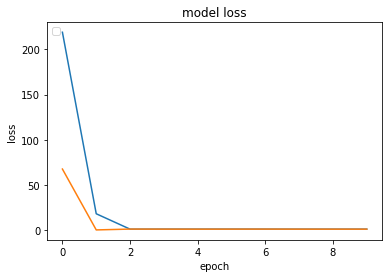

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(loc = 'upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

No handles with labels found to put in legend.


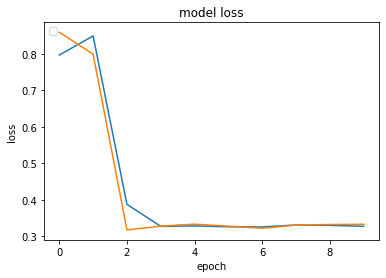

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(loc = 'upper left')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [56]:
matrix = confusion_matrix(Y_test.values.argmax(axis=1),Y_predicted.argmax(axis=1))
matrix

array([[16368,    31,     0,     0,     0,    54],
       [  118,    74,     0,     0,     0, 16349],
       [    0,     0,     0,     0,     0, 16542],
       [    0,     0,     0,     0,     0, 16361],
       [    0,     0,     0,     0,     0, 16535],
       [    0,     0,     0,     0,     0, 16475]], dtype=int64)

<AxesSubplot:>

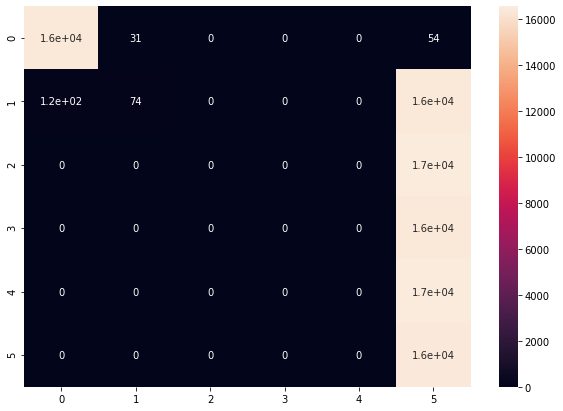

In [58]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True)
